# The Central Limit Theorem - Teorema del Limite Centrale

 <h1>📚 <mark>Introduction to the CLT </mark> </h1>

`Il teorema limite centrale` insieme alla legge dei grandi numeri è uno dei teoremi fondamentali in statistica e probabilità. 

**Esso afferma infatti che la distribuzione della media campionaria è normale a condizione che l'ampiezza del campione sia sufficientemente grande, solitamente >30.**

<u>Questo avviene indipendentemete dalla distribuzione della popolazione di partenza.</u>

**Sapendo infatti che la distribuzione della media campionaria è normale possiamo mettere in pratica la regola empirica della distribuzione normale:**

`Il 68,26% dei valori è compreso fra -1 e +1 deviazioni standard.`

`Il 95,44% dei valori è compreso fra -2 e +2 deviazioni standard.` 

`Il 99,73% dei valori è compreso fra -3 e +3 deviazioni standard.` 

Un'area di probabilità del 95% è compresa fra -1.96 e +1.96 deviazioni standard. 

Un'area di probabilità del 99% è compresa fra -2.576 e + 2.576 deviazioni standard. 


* Data una popolazione, consideriamo una feature (esempio: altezza, peso, stipendio, etc...) per ogni individuo.


**Qualsiasi sia la forma della distribuzione di partenza (popolazione)** la distribuzione delle medie dei campioni presi dalla popolazione tenderà ad una distribuzione normale.

* `the mean of the means` = $ \mu$ (Law of Large Numbers)
* `the standard deviation of the means` = $ \frac{\sigma}{\sqrt{n}} $  (Central Limit Theorem)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)


$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

👩🏻‍🔬  Let's verify this experimentally!

<img src="https://miro.medium.com/max/1400/1*Mk6EV8oIB1jlbQWcRzNRdg.png" alt="350" width="700" align="left"/>



---

## 🔢  2) The Dataset

We will use the `tips` dataset from the `seaborn` library to illustrate the Central Limit Theorem.

In [26]:
# --- Data Manipulation ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Maths ---
import math
import scipy as stats

In [12]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###  2.1) Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [13]:
tips_df.shape[0]  #244 rows (observations)

244

❓ Plot the distribution of the `tip` column 📊 (with 20 bins) ❓

<AxesSubplot:xlabel='tip', ylabel='Count'>

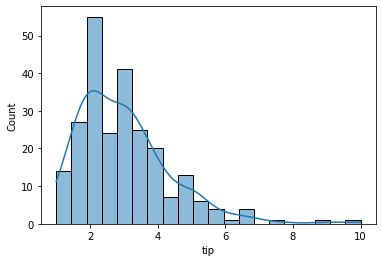

In [14]:
sns.histplot(tips_df['tip'], kde=True, bins = 20)

❓ What are : ❓
* the ***average tip***
* the ***standard deviation tip*** 
* the  [***skewness of the tips***](https://whatis.techtarget.com/definition/skewness)


In [15]:
mu = tips_df['tip'].mean() #media delle tips

print('Mean:', mu)

sd = tips_df['tip'].std() #deviazione standard delle tips

print('Standard Deviation:', sd)

skewness = 'right'

print('Skewness:', skewness) #asimmetria della distribuzione (destra in questo caso)

Mean: 2.9982786885245902
Standard Deviation: 1.3836381890011826
Skewness: right


In [16]:
tips_df.tip.describe() #statistics summary

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

* the "mode" seems to be around 2 dollars `(we can't really talk about a mode for a continuous variable but just looking at the histogram with 20 bins, we can give an estimation)
    
* the "mean" is at 2.99 dollars
    
* the median is at 2.90 dollars
    
So here we have $ mode < median < mean $ which correspond to a `right skewness` 

<h1> <mark> Applying the CLT</mark></h1>

### 3.1) <u>Graphically</u>

* `N` (how many times we sample) controls the random noise. 

* `n` (sample size) controls the shape of the distribution. 

**When n is large enough, it *converges* towards a Normal distribution. This is the Central Limit Theorem.**



<AxesSubplot:ylabel='Count'>

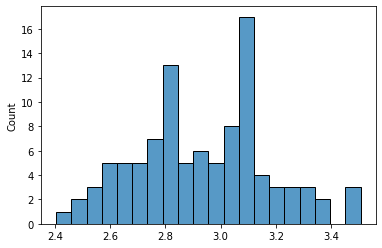

In [23]:
n = 30 # CLT applies mostly with n>30
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

### 3.2) <u>Numerically</u>

❓ Let's verify the Central Limit Theorem computationally ❓
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)

In [33]:
from scipy.stats import skew

index_df = ['mean', 'stdev','skewness']

theory = [mu, sd/np.sqrt(n), 0]

real_life = [np.mean(means), np.std(means), skew(means)] 

comparison_df = pd.DataFrame(list(zip(theory,real_life)), 
                             columns = ["CLT Theory","Real Tips"],
                             index = index_df)
round(comparison_df,2)

,CLT Theory,Real Tips
mean,3.00,2.94
stdev,0.14,0.24
skewness,0.00,0.11


## 💪  4) Use case: Probabilities of accumulating large tips at the end of a work-day

🤔 Let's pick 100 dinners from the dataset (sampling with replacement). 

<u>What is the probability that the cumulated tips ends up being **greater than 350€**? </u>


From our Exploratory Data Analysis, we have:
- 244 tips (global population)
- $\mu=3€$
- $\sigma=1.38€$

<u>Sampling once</u>

- Imagine that we draw a sample of size 100 out of the global population of dinners
- We observe the sum of these 100 sample tips is 350€, so the average tip $\mu_X$ is 3.5€ for this sample
- **The operation of drawing a sample is random, therefore the average of these sampled data will also be random**




🎉 Our sample of size $ n = 100 > 30 $ can be considered large enough to apply the Central Limit Theorem (CLT) 
    
👉 If we were to repeat this experiment (i.e. randomly picking a sample of size 100) an infinite number of times, the distribution of sample mean**s** would become exactly a normal distribution.
    
🔥 **A Gaussian distribution is _FULLY_ characterized by its _mean_ and its _standard deviation_**
    
❓ What are these mean and standard deviation in the context of a Central Limit Theorem ❓ If you forgot about it, scroll up in your notebook! 


- Shape = Gaussian
- `sample_mean` = `mu`
- `sample_sd` = `sd` / $ \sqrt{n} $


❓ Plot this expected distribution:

**On top of it, add the datapoint representing a cumulated tip of 350€ over 100 dinners.**

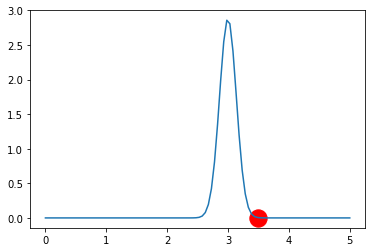

In [32]:
from scipy.stats import norm

# Expected parameters of the Gaussian variable from the CLT

n = 100
sample_mean = mu
sample_sd = sd/np.sqrt(n)

# Instantiating this Gaussian Variable
norm_expected = norm(sample_mean, sample_sd)

# Plotting the Gaussian Curve
x = np.linspace(0, 5, 100) # Most of the tips are between 0 and 5 euros
y = norm_expected.pdf(x)
plt.plot(x, y)

# Additing the targeted point
plt.scatter(350/100, norm_expected.pdf(350/100), c='r', s = 300)

👉 For this restaurant, we clearly see that 350 euros of cumulated tips over 100 dinners (average tip of 3.50 euros) seems to be is virtually impossible (this probability of this event would be close to zero).

**We are almost at the end of the challenge !**

🔢 Let's denote $ \bar{X} $ the average tip over 100 dinners 

* ❓ Compute numerically $ \mathbb{P} ( \bar{X} > 3.50 ) $ and store it in `proba_350` variable ❓
* 📚 You will need the **`cumulative distribution function (cdf)`** from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [35]:
proba_g_350 = 1 - norm_expected.cdf(3.5)
proba_g_350

0.00014386590520809595

In [41]:
print(f"Probability to observe total tips greater than 350€ = {round(proba_g_350*100,2)} %")

Probability to observe total tips greater than 350€ = 0.01 %


❗️ If we had observed such an amount, we could have deduced with a 99.99% confidence level that the 100 dinners selected were ***not randomly sampled*** from the population of dinners.

## ⭐️  5) The `z-score`

<u>**Alternative computation using z-score**</u>

🤔 Imagine you didn't have access to the `SciPy` library (or even to a computer) to compute the probability density function of a custom-made Gaussian distribution numerically. Which workaround could we use to this end ?  

💡 Instead of computing a Gaussian distribution with specific mean and sigma, a much more elegant way is to rephrase our problem to use the **`Standard Normal distribution`** $\mathcal N(0,1)$, from which we could read usual values in a **`Standard Statistical table`** 👇

$$ X \sim \mathcal N(\mu,\sigma) \leftrightarrow Y =  \frac{X - \mu}{\sigma} \sim \mathcal N(0,1) $$

<img src='https://github.com/lewagon/data-images/blob/master/math/z-table.png?raw=true'>

❓First, compute the [z-score](https://en.wikipedia.org/wiki/Standard_score) of your observation, and store it into a variable `z`❓

As a reminder: 
* sample size $ n = 100$
* mean $ = 3.5$ €

> The **`z-score`** of a measured observation $x$ is simply the value of the observation, **measured by the number of standard deviations above or below the mean** of the underlying distribution from which the observation is derived.

$$z={x-\mu  \over \sigma }$$

<details>
    <summary>💡 Hint</summary>
In our case, the value we observe is "3.5€", and the underlying distribution from which this observation was made is the means of samples (of size 100), which is Gaussian/normal with a mean $\mu$ and a std $\sigma \over \sqrt{100}$ according to the CLT.

</details>

In [37]:
z = None

In [39]:
z = ((350/100) - mu) / (sd/np.sqrt(100))
z

3.626101935200207

❓ Use the standard table above to find the probability we are looking for

> A `z-score` of $3.62$ corresponds to an area under the curve of the Normal distribution $ \mathcal{N}(0,1)$ with a surface equal to $0.9998$

> Hence, the probability of having the sum of tips greater than 350 euros is equal to  $0.0002$

❓ Double-check this probability with with `scipy.stats.norm` as done previously. Store it into a `proba_z` variable.

In [ ]:
proba_z = None

0.0001

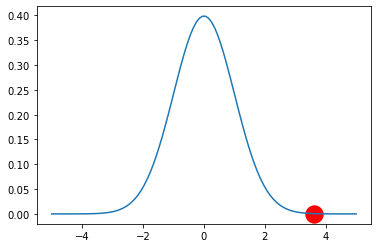

In [40]:
from scipy import stats

# --- Drawing a Standard Gaussian Curve with mean 0 and std 1
standard_gaussian = stats.norm()
x = np.linspace(-5, 5, 100)
y = standard_gaussian.pdf(x)
plt.plot(x, y)

# --- Adding the z-score of the observations on top of it
plt.scatter(z, standard_gaussian.pdf(z), c='r', s = 300)

# --- Computing the cdf of z
cumulated_z = standard_gaussian.cdf(z)

# --- Computing the proba that the standard gaussian is above the z-score
proba_z = 1 - cumulated_z
round(proba_z,4)